In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
data= pd.read_csv('/content/Wholesale customers data.csv')

In [15]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
data.columns


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [17]:
data['Channel'].nunique()

2

In [19]:
data['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [20]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [21]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [22]:
x=data[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [23]:
x

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


KMeans

In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss=[]
for i in range (1,20):
  km= KMeans (n_clusters=1, n_init=40)
  km.fit(x)
  css=km.inertia_
  wcss.append(css)


In [26]:
wcss

[157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854,
 157595857428.78854]

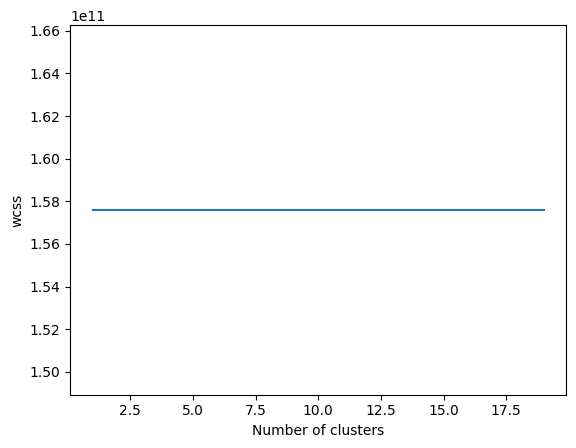

In [27]:
plt.plot(range(1,20),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [28]:
km=KMeans(n_clusters=6, n_init=40)

In [29]:
km.fit(x)

KMeans(n_clusters=6, n_init=40)

In [30]:
cluster_labels=km.predict(x)

In [31]:
cluster_labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 4, 0, 2, 2, 2, 0, 4, 0, 2, 0, 2, 0,
       2, 4, 2, 2, 0, 2, 4, 1, 2, 0, 2, 2, 0, 0, 2, 4, 4, 1, 2, 2, 4, 4,
       0, 4, 4, 3, 0, 4, 0, 0, 1, 4, 2, 0, 4, 4, 0, 0, 0, 3, 0, 4, 0, 3,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 4, 0, 0, 0, 4, 0, 2, 0, 3, 3, 1,
       0, 2, 0, 0, 4, 2, 4, 0, 0, 0, 0, 0, 4, 4, 0, 1, 2, 2, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 4, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 4, 4, 2, 0, 4, 0, 0, 2, 4, 0, 4, 0, 0, 0, 0, 4, 4, 0, 4, 0, 4,
       1, 0, 0, 0, 0, 1, 4, 5, 0, 0, 0, 0, 4, 4, 2, 0, 0, 4, 0, 2, 2, 0,
       0, 0, 4, 4, 2, 0, 0, 4, 0, 0, 0, 4, 2, 3, 0, 0, 0, 4, 4, 2, 4, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2,
       2, 0, 0, 4, 0, 0, 2, 0, 0, 4, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0,
       4, 4, 4, 2, 4, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1,
       0, 2, 2, 1, 0, 0, 0, 4, 2, 0, 2, 0, 0, 0, 2,

In [32]:
pd.Series(cluster_labels).value_counts()

0    227
2    104
4     78
1     22
3      7
5      2
dtype: int64

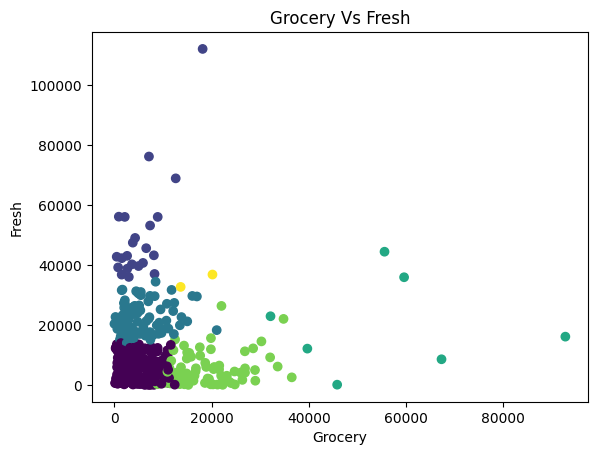

In [33]:
plt.scatter(x['Grocery'], x['Fresh'], c=cluster_labels)
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.title('Grocery Vs Fresh')
plt.show()

In [34]:
cluster_indices= np.where(cluster_labels ==0) [0]

In [35]:
cluster_indices

array([  0,   1,   2,   3,   5,   6,   7,   8,  11,  15,  17,  19,  21,
        26,  31,  34,  35,  44,  48,  50,  51,  55,  58,  59,  60,  62,
        64,  66,  68,  69,  72,  74,  76,  78,  79,  80,  82,  84,  88,
        90,  91,  95,  96,  97,  98,  99, 102, 106, 108, 110, 115, 116,
       117, 119, 121, 122, 123, 128, 130, 131, 133, 134, 135, 136, 137,
       138, 139, 143, 146, 147, 148, 151, 153, 154, 158, 160, 161, 164,
       166, 167, 168, 169, 172, 174, 177, 178, 179, 180, 184, 185, 186,
       187, 191, 192, 194, 197, 198, 199, 203, 204, 206, 207, 208, 212,
       213, 214, 219, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231,
       233, 235, 236, 238, 243, 244, 246, 247, 249, 250, 252, 254, 256,
       257, 260, 261, 263, 270, 271, 272, 274, 275, 277, 278, 280, 281,
       286, 290, 291, 292, 295, 297, 298, 299, 302, 308, 310, 313, 314,
       316, 317, 318, 320, 321, 323, 326, 327, 329, 330, 336, 337, 338,
       339, 340, 341, 342, 344, 345, 348, 350, 352, 355, 358, 35

In [36]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [37]:
data['Cluster_labels']=cluster_labels

In [38]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,4
438,1,3,10290,1981,2232,1038,168,2125,0


In [39]:
target_cluster_data= data[data['Cluster_labels']== 0]

In [40]:
target_cluster_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
5,2,3,9413,8259,5126,666,1795,1451,0
...,...,...,...,...,...,...,...,...,...
429,1,3,8607,1750,3580,47,84,2501,0
431,1,3,8533,5506,5160,13486,1377,1498,0
433,1,3,1982,3218,1493,1541,356,1449,0
438,1,3,10290,1981,2232,1038,168,2125,0


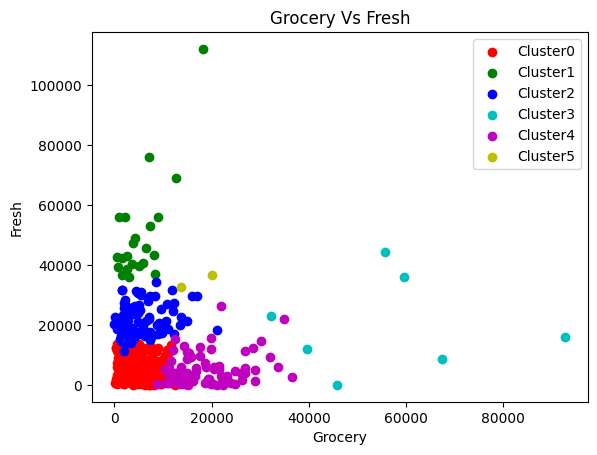

In [47]:
colors= ['r', 'g', 'b', 'c', 'm', 'y']
for cluster_num in range(max(cluster_labels) +1):
    cluster_data=x[cluster_labels == cluster_num]
    plt.scatter(cluster_data['Grocery'],
            cluster_data['Fresh'],
            c=colors[cluster_num],
            label=f'Cluster{cluster_num}')
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.title("Grocery Vs Fresh")

plt.legend()

plt.show()

Hierarchial Clustering

In [49]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [48]:
mergings= linkage(x,method="centroid")

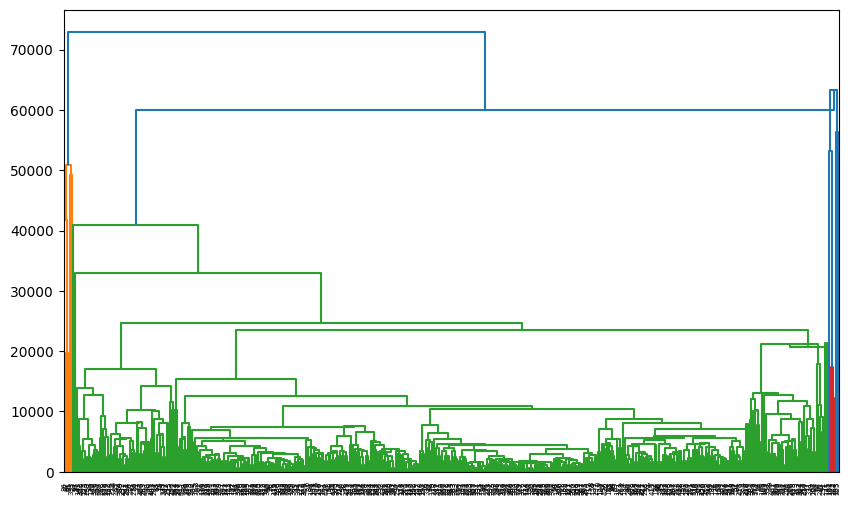

In [53]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [54]:
cluster_labels= fcluster(mergings, 40, criterion="distance")

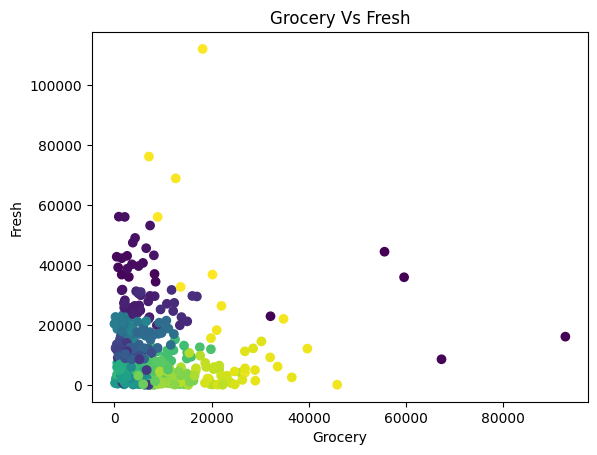

In [55]:
plt.scatter(x['Grocery'], x['Fresh'], c=cluster_labels)
plt.xlabel('Grocery')
plt.ylabel('Fresh')
plt.title('Grocery Vs Fresh')
plt.show()

In [57]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011,0.515644
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212,-0.000462
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,0.114784
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,0.502728
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,0.595228
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,0.081217
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,0.545629
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.220699
Cluster_labels,0.515644,-0.000462,0.114784,0.502728,0.595228,0.081217,0.545629,0.220699,1.000000


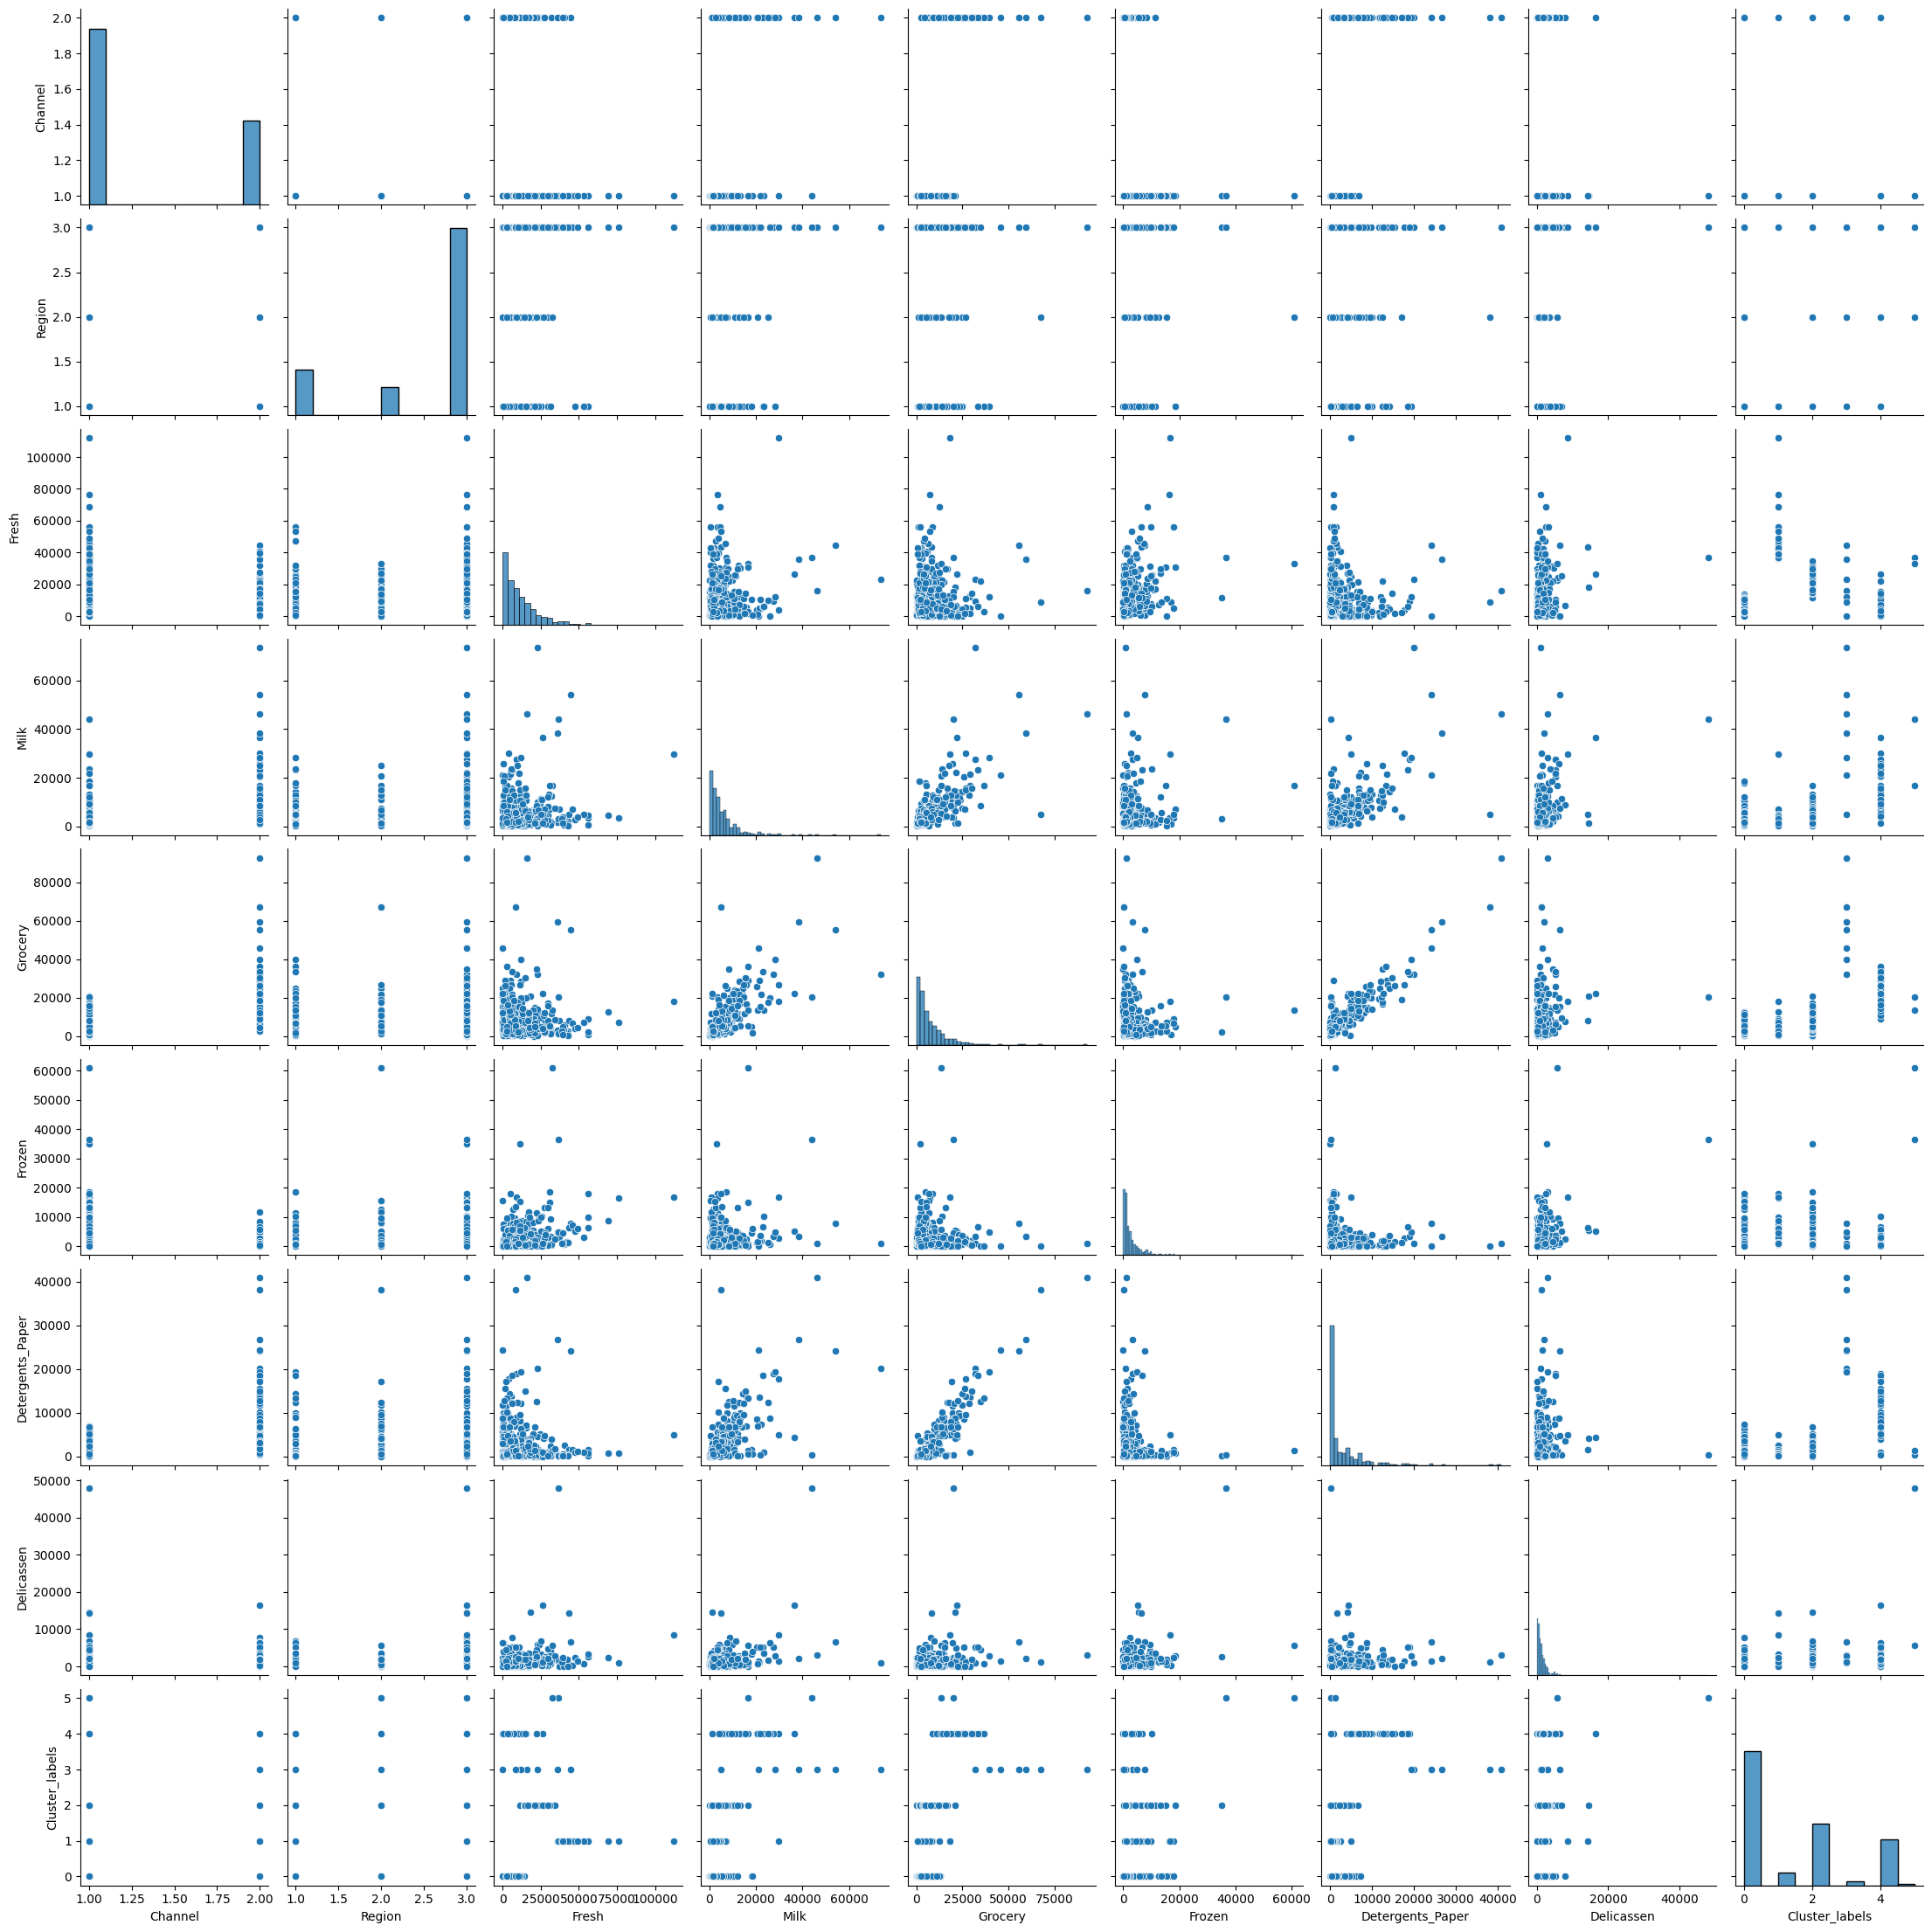

In [58]:
sns.pairplot(data)

In [59]:
from sklearn.preprocessing import scale

In [60]:
x= pd.DataFrame(scale(data), index=data.index, columns=data.columns)

PCA

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca= PCA()

In [63]:
pc_array= pca.fit_transform(x)

In [65]:
pc_array.shape

(440, 9)

In [66]:
pc_data1= pd.DataFrame(pc_array, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6','pc7', 'pc8', 'pc9'])

In [67]:
pc_data1

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,0.432867,-0.645002,-0.807999,0.181732,-0.465336,-0.316196,1.373406,0.540955,0.061995
1,0.630893,-0.632902,-0.722703,0.632749,-0.258609,-0.058904,1.325954,0.397837,0.123172
2,0.847755,0.503662,-0.739969,1.881943,-0.585664,-1.104365,1.350958,-0.318619,-0.204842
3,-1.285189,0.608974,-0.522988,0.285112,0.025940,0.544095,0.147163,-0.341557,0.071557
4,0.804826,0.965836,-0.765864,0.045910,0.341891,-1.328662,1.022695,-0.202058,0.009790
...,...,...,...,...,...,...,...,...,...
435,0.469651,2.489345,-0.360495,-0.575360,0.363464,1.100375,-0.201796,0.360573,0.854449
436,-1.197482,1.635037,-0.733673,-1.347312,-0.425320,-0.406971,0.165966,-0.250629,-0.225472
437,4.223389,-0.608366,-0.526522,-0.650874,-0.138139,0.223294,-0.315654,-0.549438,-0.101395
438,-1.351962,-0.068044,-0.645636,0.403850,-0.504223,-0.136047,-0.130808,-0.162446,-0.026652


In [69]:
pc_data1.corr().round(1)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
pc1,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
pc2,-0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
pc3,-0.0,0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0
pc4,-0.0,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0
pc5,0.0,-0.0,0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0
pc6,-0.0,0.0,0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0
pc7,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0
pc8,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0
pc9,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0


In [70]:
pca.explained_variance_

array([3.57840299, 1.8074097 , 1.01499327, 0.76014306, 0.57658621,
       0.54924411, 0.39071018, 0.28068791, 0.06232371])

In [72]:
pca.explained_variance_ratio_ * 100

array([39.66966946, 20.03668835, 11.25207189,  8.42683845,  6.39195323,
        6.08884251,  4.33135785,  3.11166646,  0.69091179])

In [77]:
pca= PCA(n_components=5)

In [78]:
pc_array1= pca.fit_transform(x)

In [79]:
pc_array1

array([[ 0.43286704, -0.64500225, -0.80799927,  0.18173209, -0.46533644],
       [ 0.63089274, -0.63290175, -0.72270292,  0.63274875, -0.25860928],
       [ 0.84775513,  0.50366184, -0.73996879,  1.88194343, -0.5856639 ],
       ...,
       [ 4.22338889, -0.60836587, -0.52652206, -0.65087399, -0.13813895],
       [-1.35196182, -0.0680439 , -0.64563631,  0.4038505 , -0.50422327],
       [-1.44457802, -0.89042398, -0.60633124,  0.39873854, -0.26495309]])

In [80]:
pc_array1.shape

(440, 5)

In [81]:
pc_data2= pd.DataFrame(pc_array1, columns= ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])

In [82]:
pc_data2.shape

(440, 5)

In [83]:
pc_data2

,pc1,pc2,pc3,pc4,pc5
0,0.432867,-0.645002,-0.807999,0.181732,-0.465336
1,0.630893,-0.632902,-0.722703,0.632749,-0.258609
2,0.847755,0.503662,-0.739969,1.881943,-0.585664
3,-1.285189,0.608974,-0.522988,0.285112,0.025940
4,0.804826,0.965836,-0.765864,0.045910,0.341891
...,...,...,...,...,...
435,0.469651,2.489345,-0.360495,-0.575360,0.363464
436,-1.197482,1.635037,-0.733673,-1.347312,-0.425320
437,4.223389,-0.608366,-0.526522,-0.650874,-0.138139
438,-1.351962,-0.068044,-0.645636,0.403850,-0.504223


In [84]:
pc_data2.corr().round(1)

,pc1,pc2,pc3,pc4,pc5
pc1,1.0,-0.0,-0.0,-0.0,0.0
pc2,-0.0,1.0,0.0,0.0,-0.0
pc3,-0.0,0.0,1.0,-0.0,0.0
pc4,-0.0,0.0,-0.0,1.0,-0.0
pc5,0.0,-0.0,0.0,-0.0,1.0


In [85]:
pca.explained_variance_

array([3.57840299, 1.8074097 , 1.01499327, 0.76014306, 0.57658621])

In [86]:
pca.explained_variance_ratio_ *100

array([39.66966946, 20.03668835, 11.25207189,  8.42683845,  6.39195323])